In [1]:
## Choose GPUs and CPUs

#If want to choose GPU to use
#import os
#os.environ["CUDA_VISIBLE_DEVICES"]="3"
#This will make it so that only the 0th GPU is visible to TensorFlow.
#In your case, you can choose any in the range [0, 3].
#If you wanted, for example, the 0th and 2nd GPUs to both be visible, replace "0" with "0,2"

import tensorflow as tf
#import tensorflow.keras
from tensorflow.keras import backend as K
from tensorflow.keras.datasets import mnist

from tensorflow.keras.layers import Conv2D, MaxPool2D
from tensorflow.keras.models import Sequential
#from tensorflow.keras.utils import to_categorical, multi_gpu_model, plot_model
from tensorflow.keras.layers import Input, Dense, Conv2D, MaxPooling2D, UpSampling2D, Dropout
from tensorflow.keras.models import Model

"""
import tensorflow.keras_helper

GPU=True
CPU=False
num_cores = 4

if GPU:
    num_GPU = 1
    num_CPU = 1
if CPU:
    num_CPU = 1
    num_GPU = 0

config = tf.ConfigProto(intra_op_parallelism_threads=num_cores,\
        inter_op_parallelism_threads=num_cores, allow_soft_placement=True,\
        device_count = {'CPU' : num_CPU, 'GPU' : num_GPU},\
#        gpu_options=tf.GPUOptions(per_process_gpu_memory_fraction=0.5))
                       )
session = tf.Session(config=config)
K.set_session(session)
"""

# Config the matplotlib backend as plotting inline in IPython
%matplotlib inline

2022-01-25 17:58:54.272944: I tensorflow/stream_executor/platform/default/dso_loader.cc:53] Successfully opened dynamic library libcudart.so.11.0


In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os,glob
from keras.callbacks import ReduceLROnPlateau

In [3]:
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib
plt.style.use('seaborn-white')
matplotlib.rc('font',family='Times New Roman')
matplotlib.rcParams['font.size'] = 32

## Seed random number for reproducibility

In [4]:
from numpy.random import seed
#from tensorflow import set_random_seed

## Set path for network weights

In [5]:
wt_path = 'model_weights'

In [6]:
X_train=np.load('DATA/Xtrain_reduced_set.npy')
X_test=np.load('DATA/Xtest_reduced_set.npy')

Y_train=np.load('DATA/Ytrain_reduced_set.npy')
Y_test=np.load('DATA/Ytest_reduced_set.npy')

In [7]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
#import keras
import tensorflow.keras.backend as K

In [8]:
nepochs=500
batch_size=16
lr=0.1e-3

In [9]:
K.clear_session()
seed(1)
tf.random.set_seed(1)
model = Sequential()
model.add(Dense(900, input_dim=115, activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(1200, activation='relu'))
model.add(Dropout(0.25))
#model.add(Dense(1200, activation='relu'))
#model.add(Dropout(0.25))
model.add(Dense(4))
model.summary()
adam=tf.keras.optimizers.Adam(lr)
model.compile(loss='mean_squared_error', optimizer=adam)

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 900)               104400    
_________________________________________________________________
dropout (Dropout)            (None, 900)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 1200)              1081200   
_________________________________________________________________
dropout_1 (Dropout)          (None, 1200)              0         
_________________________________________________________________
dense_2 (Dense)              (None, 4)                 4804      
Total params: 1,190,404
Trainable params: 1,190,404
Non-trainable params: 0
_________________________________________________________________


2022-01-25 17:58:56.287515: I tensorflow/stream_executor/platform/default/dso_loader.cc:53] Successfully opened dynamic library libcuda.so.1
2022-01-25 17:58:56.316873: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-01-25 17:58:56.317036: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1733] Found device 0 with properties: 
pciBusID: 0000:01:00.0 name: NVIDIA GeForce GTX 1650 Ti computeCapability: 7.5
coreClock: 1.485GHz coreCount: 16 deviceMemorySize: 3.82GiB deviceMemoryBandwidth: 178.84GiB/s
2022-01-25 17:58:56.317056: I tensorflow/stream_executor/platform/default/dso_loader.cc:53] Successfully opened dynamic library libcudart.so.11.0
2022-01-25 17:58:56.334372: I tensorflow/stream_executor/platform/default/dso_loader.cc:53] Successfully opened dynamic library libcublas.so.11
2022-01-25 17:58:56.334428: I tensorflow/stream_executor/

In [10]:
files=glob.glob('%s/*' %wt_path)
for file in files:
    os.remove(file)
    
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.5,
                              patience=20, min_lr=0.01e-3, verbose=1)

checkpoints=tf.keras.callbacks.ModelCheckpoint('%s/weights.{epoch:02d}.hdf5' %wt_path, 
                                            monitor='val_loss', verbose=1, save_best_only=True, 
                                            save_weights_only=False, mode='auto', period=1)

history=model.fit(X_train, Y_train, shuffle=True, batch_size=batch_size, verbose=1, 
                           epochs=nepochs, validation_split = 0.1, callbacks=[checkpoints, reduce_lr])

Epoch 1/500


2022-01-25 17:58:57.507210: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:176] None of the MLIR Optimization Passes are enabled (registered 2)
2022-01-25 17:58:57.518675: I tensorflow/core/platform/profile_utils/cpu_utils.cc:114] CPU Frequency: 2300000000 Hz
2022-01-25 17:58:57.800799: I tensorflow/stream_executor/platform/default/dso_loader.cc:53] Successfully opened dynamic library libcublas.so.11


30/33 [==========================>...] - ETA: 0s - loss: 2.4412

2022-01-25 17:58:58.661257: I tensorflow/stream_executor/platform/default/dso_loader.cc:53] Successfully opened dynamic library libcublasLt.so.11


33/33 [==============================] - 1s 6ms/step - loss: 2.3486 - val_loss: 0.9379

Epoch 00001: val_loss improved from inf to 0.93786, saving model to model_weights/weights.01.hdf5
Epoch 2/500
33/33 [==============================] - 0s 11ms/step - loss: 1.1807 - val_loss: 0.8348

Epoch 00002: val_loss improved from 0.93786 to 0.83481, saving model to model_weights/weights.02.hdf5
Epoch 3/500
33/33 [==============================] - 0s 5ms/step - loss: 1.0502 - val_loss: 0.7379

Epoch 00003: val_loss improved from 0.83481 to 0.73785, saving model to model_weights/weights.03.hdf5
Epoch 4/500
33/33 [==============================] - 0s 11ms/step - loss: 0.9198 - val_loss: 0.7057

Epoch 00004: val_loss improved from 0.73785 to 0.70572, saving model to model_weights/weights.04.hdf5
Epoch 5/500
33/33 [==============================] - 0s 10ms/step - loss: 0.8461 - val_loss: 0.8609

Epoch 00005: val_loss did not improve from 0.70572
Epoch 6/500
33/33 [==============================] - 0

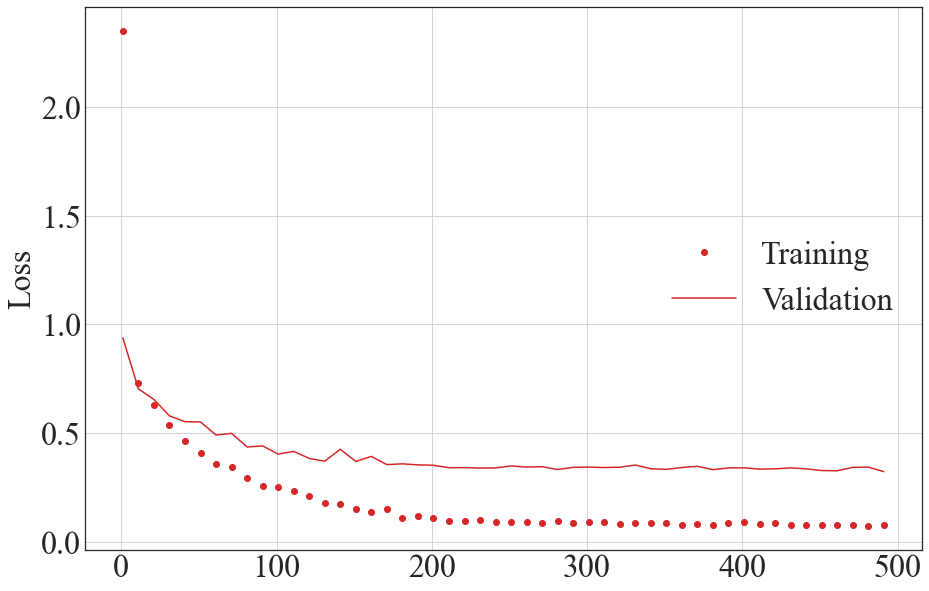

In [11]:
hist=history
epochs=np.asarray(history.epoch)+1


f, axarr = plt.subplots(1, sharex=True, figsize=(15, 10))

axarr.set(ylabel='Loss')
#axarr.plot(epochs,np.log10(hist.history['loss']), 'C3o', label='Training')
#axarr.plot(epochs,np.log10(hist.history['val_loss']), 'C3-', label='Validation')
axarr.plot(epochs[::10],hist.history['loss'][::10], 'C3o', label='Training')
axarr.plot(epochs[::10],hist.history['val_loss'][::10], 'C3-', label='Validation')
axarr.grid()
axarr.legend(loc='center right', bbox_to_anchor=(1.0, 0.5))

In [12]:
val_losses=hist.history['val_loss']
min_epoch=np.argmin(val_losses)+1
print (min_epoch)
np.save('%s/min_epoch' %(wt_path), min_epoch)

494


In [13]:
from keras.models import Model, load_model
test_model=load_model('%s/weights.%02d.hdf5' %(wt_path,min_epoch))

In [14]:
min_epoch = np.load('%s/min_epoch.npy' %wt_path)
preds_test=test_model.predict(X_test)
test_model.evaluate(X_test, Y_test)

3/3 [==============================] - 3s 3ms/step - loss: 0.2154


0.2154340147972107

In [15]:
preds_train=test_model.predict(X_train)

In [16]:
def rmse(predictions, targets):
    return np.sqrt(((predictions - targets) ** 2).mean())

lat_rmse=rmse(preds_test[:,0], Y_test[:,0])
bg1_rmse=rmse(preds_test[:,1], Y_test[:,1])
bg2_rmse=rmse(preds_test[:,2], Y_test[:,2])
form_rmse=rmse(preds_test[:,3], Y_test[:,3])

print ("Lattice RMSE (A)", lat_rmse)
print ("Formation E RMSE (eV)", form_rmse)
print ("Direct band gap RMSE (eV)", bg1_rmse)
print ("Indirect band gap RMSE(eV)", bg2_rmse)

Lattice RMSE (A) 0.08227000796036402
Formation E RMSE (eV) 0.17765975925800964
Direct band gap RMSE (eV) 0.6440502959261014
Indirect band gap RMSE(eV) 0.6392213492830747


In [17]:
import sklearn
from sklearn.metrics import r2_score

print ("Lattice R2 (A)", r2_score(Y_test[:,0], preds_test[:,0]))
print ("Formation E R2 (eV)", r2_score(Y_test[:,1], preds_test[:,1]))
print ("Direct band gap R2 (eV)", r2_score(Y_test[:,2], preds_test[:,2]))
print ("Indirect band gap R2 (eV)", r2_score(Y_test[:,3], preds_test[:,3]))

Lattice R2 (A) 0.911704790636864
Formation E R2 (eV) 0.8110566065309098
Direct band gap R2 (eV) 0.802270389793958
Indirect band gap R2 (eV) 0.8650467329350336


In [18]:
from scipy.stats import pearsonr

print ("Lattice R (A)", pearsonr(Y_test[:,0], preds_test[:,0]))
print ("Formation E R (eV)", pearsonr(Y_test[:,1], preds_test[:,1]))
print ("Direct band gap R (eV)", pearsonr(Y_test[:,2], preds_test[:,2]))
print ("Indirect band gap R (eV)", pearsonr(Y_test[:,3], preds_test[:,3]))

Lattice R (A) (0.9613702198386176, 1.2204316023503343e-42)
Formation E R (eV) (0.9032850717840595, 1.5278228434940173e-28)
Direct band gap R (eV) (0.8977766552463115, 1.04415343453948e-27)
Indirect band gap R (eV) (0.9405548042490536, 5.7439800890873206e-36)


Text(0.45, 0.1, 'Test RMSE:0.18 eV')

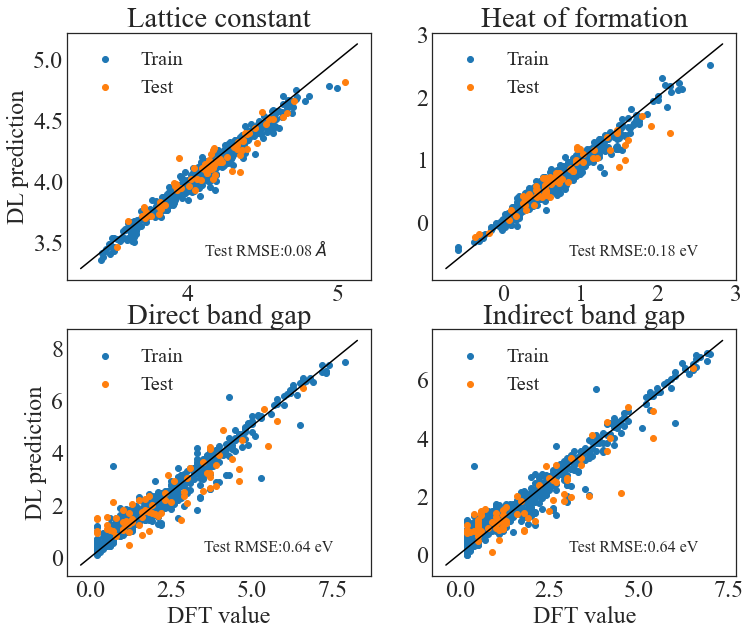

In [19]:
matplotlib.rcParams['font.size'] = 24
def get_lims(ax):
    lims = [
    np.min([ax.get_xlim(), ax.get_ylim()]),  # min of both axes
    np.max([ax.get_xlim(), ax.get_ylim()]),  # max of both axes
    ]
    return lims
    
fig, ax = plt.subplots(2,2, figsize=(12,10))

ax[0,0].scatter(Y_train[:,0], preds_train[:,0], label='Train')
ax[0,0].scatter(Y_test[:,0], preds_test[:,0], label='Test')
ax[0,0].plot(get_lims(ax[0,0]), get_lims(ax[0,0]), 'k-')
ax[0,0].set_title('Lattice constant')
ax[0,0].set_ylabel('DL prediction')
ax[0,0].legend(fontsize=20)
ax[0,0].text(0.45,0.1,'Test RMSE:%.2f $\AA$' %lat_rmse, transform=ax[0,0].transAxes, fontsize = 16)

ax[1,0].scatter(Y_train[:,1], preds_train[:,1], label='Train')
ax[1,0].scatter(Y_test[:,1], preds_test[:,1], label='Test')
ax[1,0].plot(get_lims(ax[1,0]), get_lims(ax[1,0]), 'k-')
ax[1,0].set_title('Direct band gap')
ax[1,0].set_ylabel('DL prediction')
ax[1,0].set_xlabel('DFT value')
ax[1,0].legend(fontsize=20)
ax[1,0].text(0.45,0.1,'Test RMSE:%.2f eV' %bg1_rmse, transform=ax[1,0].transAxes, fontsize = 16)

ax[1,1].scatter(Y_train[:,2], preds_train[:,2], label='Train')
ax[1,1].scatter(Y_test[:,2], preds_test[:,2], label='Test')
ax[1,1].plot(get_lims(ax[1,1]), get_lims(ax[1,1]), 'k-')
ax[1,1].set_title('Indirect band gap')
ax[1,1].set_xlabel('DFT value')
ax[1,1].legend(fontsize=20)
ax[1,1].text(0.45,0.1,'Test RMSE:%.2f eV' %bg2_rmse, transform=ax[1,1].transAxes, fontsize = 16)

ax[0,1].scatter(Y_train[:,3], preds_train[:,3], label='Train')
ax[0,1].scatter(Y_test[:,3], preds_test[:,3], label='Test')
ax[0,1].plot(get_lims(ax[0,1]), get_lims(ax[0,1]), 'k-')
ax[0,1].set_title('Heat of formation')
ax[0,1].legend(fontsize=20)
ax[0,1].text(0.45,0.1,'Test RMSE:%.2f eV' %form_rmse, transform=ax[0,1].transAxes, fontsize = 16)
